In [1]:
# imports
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import spearmanr

sns.set_style("darkgrid")

In [2]:
# Dataset
data = pd.read_json('./data/union_all_jsons-v2.json')
data.head(10)


,author_name,malware_families,more_indicators,references,targeted_countries,created,description,indicators,extract_source,adversary,revision,tags,public,industries,name,modified,tlp,attack_ids,id
0,CyberHunterAutoFeed,[WannaCry],False,[https://twitter.com/TrackerC2Bot/status/16701...,[],2023-06-17T23:32:43.350000,,[],[],,1,[malware],1,[],Twitter Feed - TrackerC2Bot - 17-06-2023,2023-07-17 23:00:00.066,green,[],648e429b3f9f53ead458aed6
1,CyberHunterAutoFeed,[WannaCry],False,[https://twitter.com/balkanssec/status/1670095...,[],2023-06-17T23:32:40.404000,,[],[],,1,[malware],1,[],Twitter Feed - balkanssec - 17-06-2023,2023-07-17 23:00:00.066,green,[],648e4298b1d2a6e9172a7faf
2,CyberHunterAutoFeed,[WannaCry],False,[https://twitter.com/Jane_0sint/status/1670048...,[],2023-06-17T23:32:37.232000,,[],[],,1,[],1,[],Twitter Feed - Jane_0sint - 17-06-2023,2023-07-17 23:00:00.066,green,[],648e4295a23d05aba14aa967
3,CyberHunterAutoFeed,[WannaCry],False,[https://twitter.com/0xToxin/status/1670042835...,[],2023-06-17T23:32:36.465000,,"[{'indicator': 'promotores14.duckdns.org', 'is...",[],,1,[AsyncRAT],1,[],Twitter Feed - 0xToxin - 17-06-2023,2023-07-17 23:00:00.066,green,[],648e429465b2a2af5a63a68b
4,CyberHunterAutoFeed,[WannaCry],False,[https://twitter.com/malwrhunterteam/status/16...,[],2023-06-17T23:32:34.901000,,[{'indicator': 'qe6evcafs0.execute-api.us-east...,[],,1,[],1,[],Twitter Feed - malwrhunterteam - 17-06-2023,2023-07-17 23:00:00.066,green,[],648e4292d5509e223192b47a
5,BotnetExposer,[WannaCry],False,[],[],2023-07-20T10:05:44.880000,Scans hitting the server at TCP port 139 NETBI...,[],[],,1,"[tcp, NETBIOS, honeypot, Malicious IP, botnet,...",1,[],Scan port 139 NETBIOS (S3#),2023-08-19 10:00:06.067,green,[],64b906f8d00d219342d8573c
6,BotnetExposer,[WannaCry],False,[],[],2023-07-20T10:05:14.261000,Scans hitting the server at TCP port 135 DCOM ...,[],[],,1,"[tcp, udp, DCOM, RPC, honeypot, Malicious IP, ...",1,[],Scan port 135 DCOM RPC (S3#),2023-08-19 10:00:06.067,green,[],64b906da5587b663dcdbbf5a
7,BotnetExposer,[WannaCry],False,[],[],2023-07-20T10:03:43.247000,Scans hitting the server at TCP port 8080 HTTP...,[],[],,1,"[tcp, honeypot, Malicious IP, botnet, mirai, b...",1,[],Scan port 8080 HTTP and proxy (S3#),2023-08-19 10:00:06.067,green,[],64b9067f87fcd0652909cedf
8,jamesbrine,[WannaCry],False,[https://jamesbrine.com.au/vultrmadrid-ssh-bru...,[Spain],2023-08-19T09:46:03.359000,IPV4 hosts detected attempting to attack SSH o...,"[{'indicator': '61.177.172.160', 'is_active': ...",[],,1,"[vultr, ssh, scanners, honeypot]",1,[],Vultr Madrid (Spain) SSH Attacker Hosts for 20...,2023-08-19 09:46:03.359,green,[],64e08f5b60d831e4dce60553
9,jamesbrine,[WannaCry],False,[https://jamesbrine.com.au/vultrwarsaw-ssh-bru...,[Poland],2023-08-19T09:43:08.919000,IPV4 hosts detected attempting to attack SSH o...,"[{'indicator': '89.190.203.54', 'is_active': 1...",[],,1,"[vultr, ssh, scanners, honeypot]",1,[],Vultr Warsaw (Poland) SSH Attacker Hosts for 2...,2023-08-19 09:43:08.919,green,[],64e08eacd638ebaa25cfc3fa


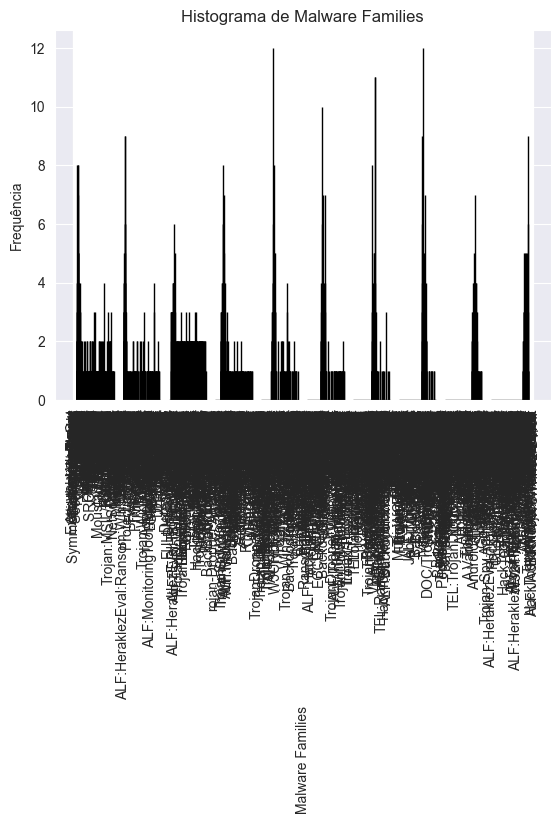

In [3]:
# Crie um histograma do campo 'malware_families'
plt.hist(data['malware_families'], bins=10, edgecolor='k')
plt.xlabel('Malware Families', rotation='vertical')
plt.ylabel('Frequência')
plt.title('Histograma de Malware Families')

plt.xticks(rotation=90)

plt.show()

C:\Users\vinic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\vinic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


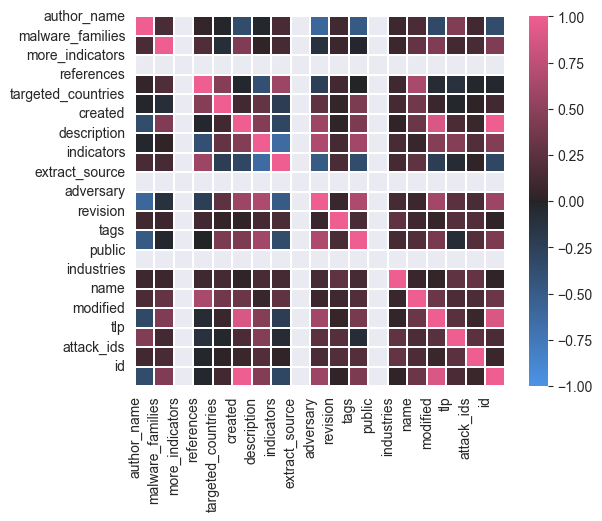

In [4]:
# Correlaçao das colunas não numericas

# Selecione apenas as colunas não numéricas
non_numeric_columns = data.select_dtypes(exclude=['number'])

# Crie um novo DataFrame para armazenar as colunas convertidas
converted_data = data.copy()

# Converta as colunas não numéricas em valores numéricos
for column in non_numeric_columns.columns:
    if data[column].apply(lambda x: isinstance(x, list)).any():
        # Se a coluna contiver listas, converta-as em strings antes de aplicar pd.factorize()
        converted_data[column] = pd.factorize(converted_data[column].astype(str))[0]
    else:
        converted_data[column] = pd.factorize(converted_data[column])[0]

# Calcule a correlação de Spearman entre as colunas convertidas
correlation_matrix, _ = spearmanr(converted_data)

# Configure o mapa de cores e plote o heatmap
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=.2)

# Adicione rótulos às colunas e linhas
plt.xticks(range(len(converted_data.columns)), converted_data.columns, rotation=90)
plt.yticks(range(len(converted_data.columns)), converted_data.columns, rotation='horizontal')

# Exiba o heatmap
plt.show()

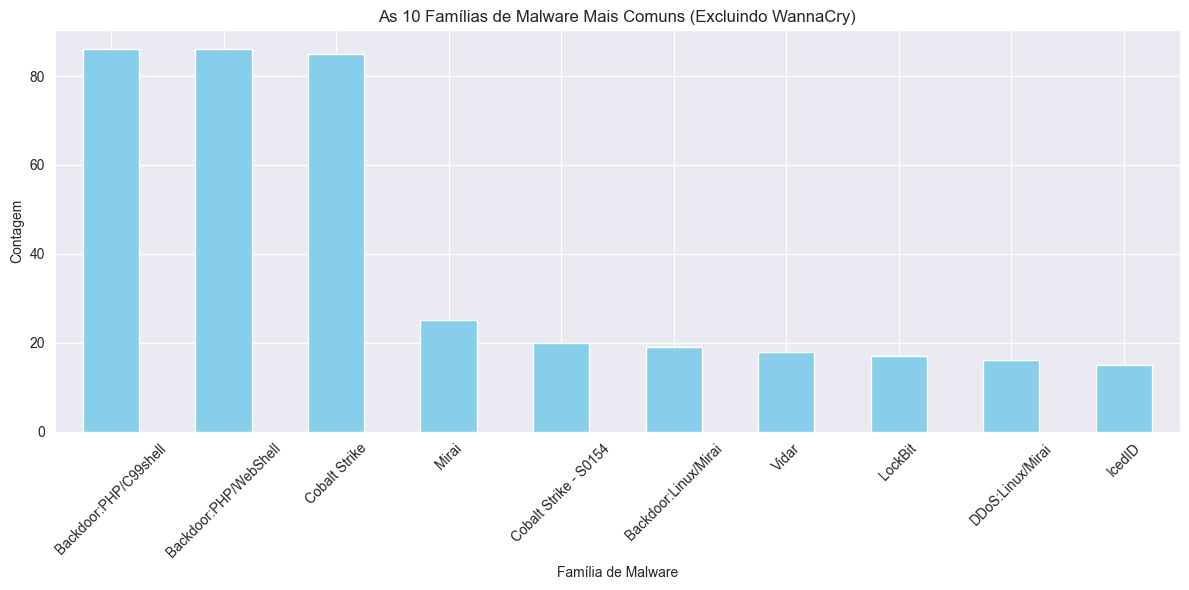

In [5]:
import matplotlib.pyplot as plt

# Filtrar os dados excluindo 'WannaCry'
data = data[~data['malware_families'].apply(lambda x: 'WannaCry' in x)]

# Contagem das famílias de malware
malware_counts = data['malware_families'].explode().value_counts()

# Selecionar as 10 famílias de malware mais comuns
top_10_malwares = malware_counts.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_malwares.plot(kind='bar', color='skyblue')
plt.xlabel('Família de Malware')
plt.ylabel('Contagem')
plt.title('As 10 Famílias de Malware Mais Comuns (Excluindo WannaCry)')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dataset
data = pd.read_json('./data/union_all_jsons-v2.json')

# Filtrar apenas os malwares do tipo WannaCry e aqueles que não são
wannacry_data = data[data['malware_families'].apply(lambda x: 'WannaCry' in x)]
non_wannacry_data = data[data['malware_families'].apply(lambda x: 'WannaCry' not in x)]

# Extrair os indicadores como uma lista de strings
wannacry_indicators = [' '.join([indicator['indicator'] for indicator in indicators]) for indicators in wannacry_data['indicators']]
non_wannacry_indicators = [' '.join([indicator['indicator'] for indicator in indicators]) for indicators in non_wannacry_data['indicators']]

# Criar um vetorizador de texto para os indicadores
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(wannacry_indicators + non_wannacry_indicators)

# Rotular os dados - 1 para WannaCry e 0 para não WannaCry
y = [1] * len(wannacry_data) + [0] * len(non_wannacry_data)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o classificador Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

print(f"A acurácia do modelo é: {accuracy * 100:.2f}%")


A acurácia do modelo é: 91.64%


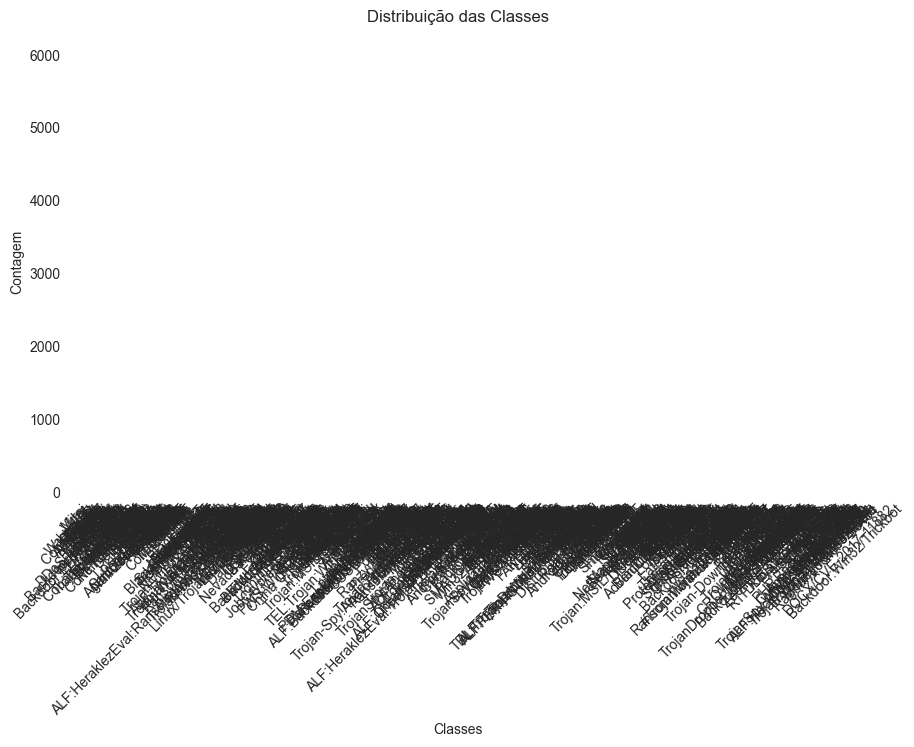

Razão entre classes: 0.00


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Substitua 'malware_families' pelo nome da coluna que contém as classes no seu conjunto de dados
classe_coluna = 'malware_families'

# Desempacote as listas para obter as strings (caso haja mais de uma por registro)
data[classe_coluna] = data[classe_coluna].apply(lambda x: x[0] if x else None)

# Calcule a contagem de exemplos em cada classe
contagem_classes = data[classe_coluna].value_counts()

# Escolha uma cor única escura para todas as barras (por exemplo, preto)
cor_das_barras = 'black'

# Plote um gráfico de barras com a cor única e escura
plt.figure(figsize=(10, 6))
contagem_classes.plot(kind='bar', color=cor_das_barras)
plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Calcule a razão entre a classe minoritária e a classe majoritária
razao_classes = min(contagem_classes) / max(contagem_classes)
print(f'Razão entre classes: {razao_classes:.2f}')
